In [45]:
import pandas
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
drive.mount('drive/')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [73]:


# Google Sheets CSV export link
csv_url = 'https://docs.google.com/spreadsheets/d/1sR4PpWqyrXn8fKJaLH52AhLZF2w9mitpihWO7X32Skc/export?format=csv'

# Load the dataset
df = pandas.read_csv(csv_url)

# Check the data
df


,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


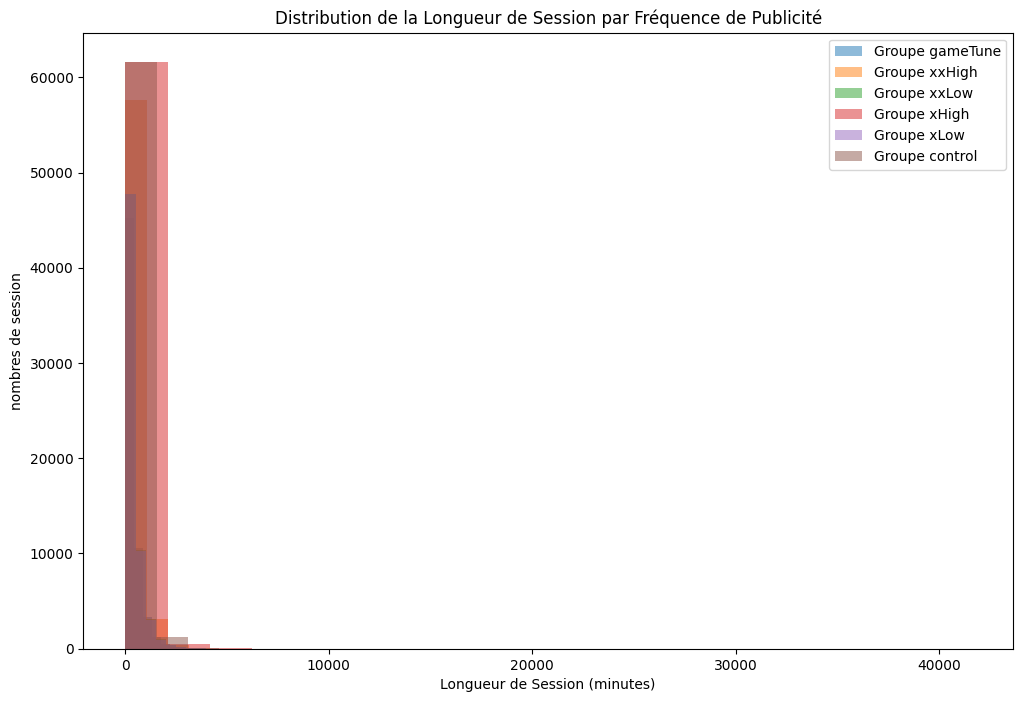

In [65]:
frequencies = df['ab_cohort_name'].unique()

# Configuration de la figure
plt.figure(figsize=(12, 8))

# Créer des histogrammes pour chaque fréquence
for freq in frequencies:
    plt.hist(df[df['ab_cohort_name'] == freq]['session_length'],
             bins=20,
             alpha=0.5,
             label=f'Groupe {freq}')

# Ajouter des éléments au graphique
plt.title('Distribution de la Longueur de Session par Fréquence de Publicité')
plt.xlabel('Longueur de Session (minutes)')
plt.ylabel('nombres de session')
plt.legend()
plt.show()



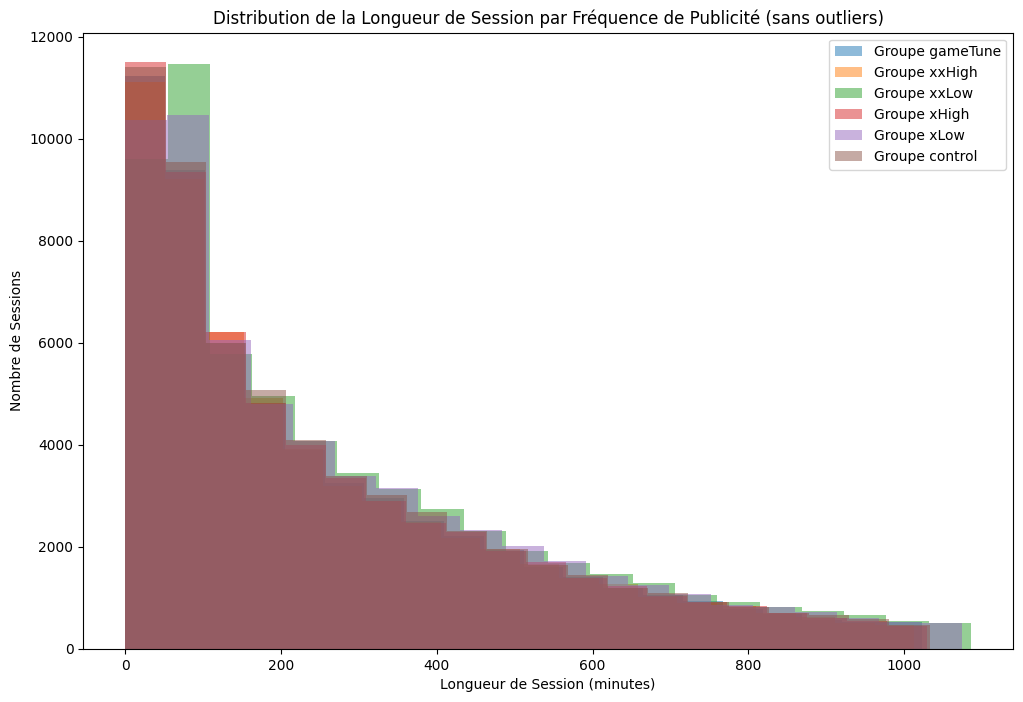

In [69]:
import matplotlib.pyplot as plt

# Calculer les bornes de l'IQR pour chaque groupe et supprimer les outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile
    Q3 = df[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Retourner le DataFrame sans les outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Créer une liste des fréquences de l'AB Test
frequencies = df['ab_cohort_name'].unique()

# Configuration de la figure
plt.figure(figsize=(12, 8))

# Créer des histogrammes pour chaque fréquence, en enlevant les outliers
for freq in frequencies:
    # Filtrer les données pour chaque groupe en fonction de la fréquence et enlever les outliers
    df_filtered = df[df['ab_cohort_name'] == freq]
    df_filtered_no_outliers = remove_outliers(df_filtered, 'session_length')

    # Créer un histogramme pour chaque groupe
    plt.hist(df_filtered_no_outliers['session_length'],
             bins=20,
             alpha=0.5,
             label=f'Groupe {freq}')

# Ajouter des éléments au graphique
plt.title('Distribution de la Longueur de Session par Fréquence de Publicité (sans outliers)')
plt.xlabel('Longueur de Session (minutes)')
plt.ylabel('Nombre de Sessions')
plt.legend()
plt.show()

<ipython-input-72-d76597777471>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length'))


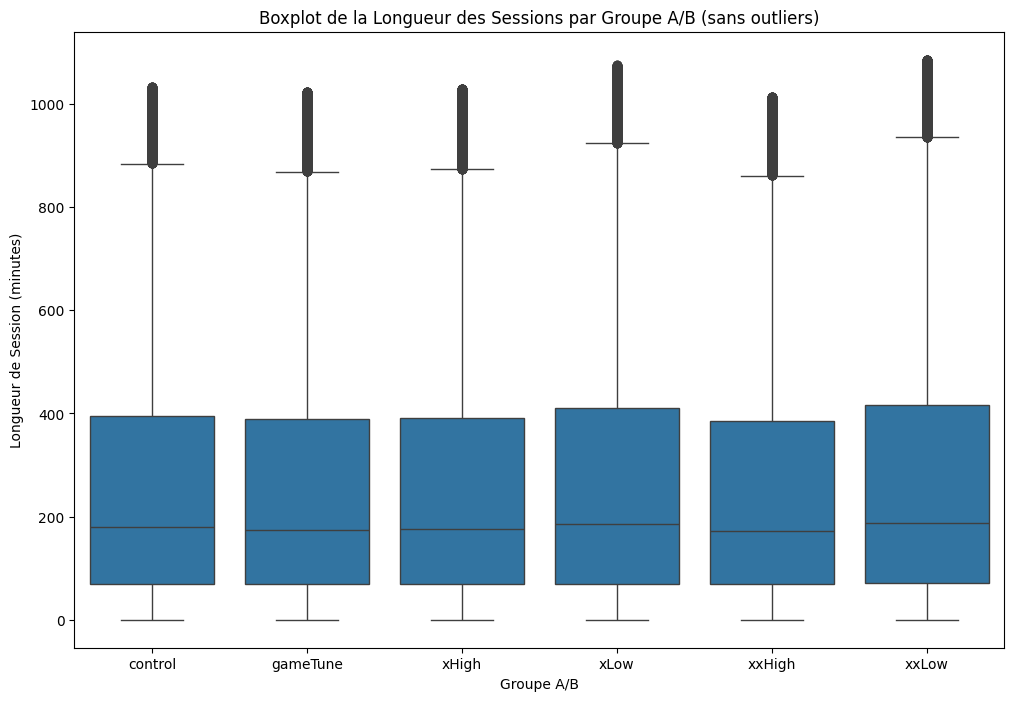

In [72]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile
    Q3 = df[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Retourner le DataFrame sans les outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la fonction de suppression des outliers pour chaque groupe
df_no_outliers = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length'))
frequencies = df['ab_cohort_name'].unique()
# Créer le boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='ab_cohort_name', y='session_length', data=df_no_outliers)

# Ajouter des titres et labels
plt.title('Boxplot de la Longueur des Sessions par Groupe A/B (sans outliers)')
plt.xlabel('Groupe A/B')
plt.ylabel('Longueur de Session (minutes)')

# Afficher le graphique
plt.show()

In [62]:
# Nous avons constaté des incohérences sur le temps de jeu des joueurs . Ce qui vient à dire que notre jeu de données comporte des valeurs aberrantes .
#Nous allons par la suite les detecter et les supprimer

<ipython-input-71-98c734eb4ecc>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length'))


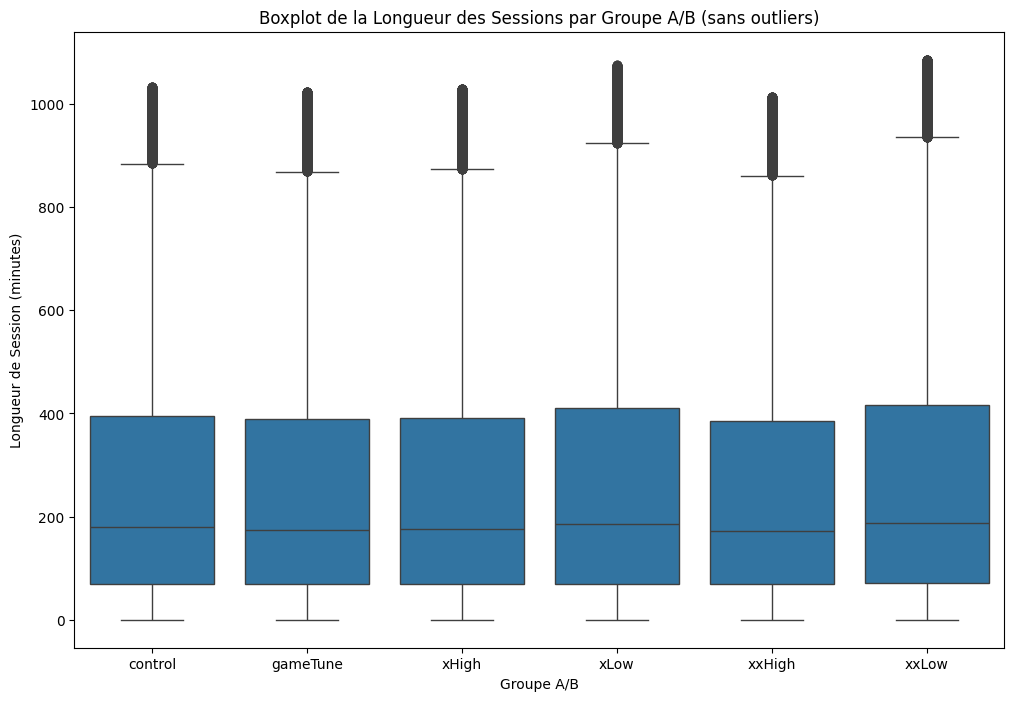

In [71]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Premier quartile
    Q3 = df[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les limites pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Retourner le DataFrame sans les outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la fonction de suppression des outliers pour chaque groupe
df_no_outliers = df.groupby('ab_cohort_name').apply(lambda x: remove_outliers(x, 'session_length'))

# Créer le boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='ab_cohort_name', y='session_length', data=df_no_outliers)

# Ajouter des titres et labels
plt.title('Boxplot de la Longueur des Sessions par Groupe A/B (sans outliers)')
plt.xlabel('Groupe A/B')
plt.ylabel('Longueur de Session (minutes)')

# Afficher le graphique
plt.show()

In [29]:
df = df.drop_duplicates()


print(f"Nombre de lignes après suppression des doublons : {len(df)}")
df

Nombre de lignes après suppression des doublons : 372834


,session_id,platform,open_at,user_id,country,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count,acquired_at,segment_name,ab_name,ab_cohort_name
0,e058d9e3-ea0c-4d16-a36e-3e9ed3840457,android,2020-02-09 11:27:45.717000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,36,5,0.000010,0,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
1,6b9d2f3d-fe82-45fb-9c67-9408934393b1,android,2020-02-09 11:04:38.491000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,158,4,0.000110,1,0,1,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
2,bdf0bb00-9241-4e2a-969b-c55267befa76,android,2020-02-09 10:59:48.496000,3675ed02-ea35-4f01-8375-2ee48b06ac5c,TN,790,783,90,3,0.000020,1,0,0,0,2020-02-08 10:35:38.630000,android_new_users,ab-test_android,gameTune
3,79ea0b6c-ea19-480d-b6b4-60acbef70241,android,2020-02-05 12:15:02.907000,51ea5d8d-9b28-4111-ab23-40961dc43321,AE,789,783,517,1,0.055515,7,0,4,0,2020-02-05 12:15:02.907000,android_new_users,ab-test_android,xxHigh
4,f5f1f67f-ac44-45ba-9650-07b8081d897f,android,2020-02-07 06:03:13.014000,ecfbf8db-300f-4ceb-a533-47d9bf0c9fc7,AE,790,783,385,1,0.014300,2,0,5,0,2020-02-07 06:03:13.014000,android_new_users,ab-test_android,gameTune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372829,8be26aa7-be0c-45c4-b55e-935f5d35cec4,ios,2020-02-17 07:52:06.131000,af301d08-dd5a-42c5-b9e8-b9115073ec2d,US,796,792,91,1,0.034047,1,0,2,0,2020-02-17 07:52:06.131000,ios_new_users,ab-test_ios,control
372830,f43b7940-7b04-43d2-97e7-e84679303bcf,ios,2020-02-17 04:38:01.166000,74b69fd3-5fbb-4de2-9e1d-edda05bf70de,US,799,792,452,1,0.104641,5,0,4,0,2020-02-17 04:38:01.166000,ios_new_users,ab-test_ios,gameTune
372831,cd5b92af-a4ec-4a63-ba15-018c461f194d,ios,2020-02-17 05:37:26.929000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,134,3,0.023911,1,0,1,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh
372832,e094a2e7-598d-4686-b445-3f9196ff7936,ios,2020-02-17 02:25:25.366000,b7c1d4da-6803-4f22-b7d7-3170f8f0ecd3,US,797,792,271,2,0.104209,5,0,3,0,2020-02-17 00:51:04.120000,ios_new_users,ab-test_ios,xHigh


In [32]:

df.describe()

,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count
count,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000
mean,790.118836,785.972293,343.127223,4.733648,0.037661,3.962396,0.116744,3.295349,0.329238
std,4.728462,4.234101,428.156511,5.541589,0.059510,5.833954,0.587625,4.281505,2.304426
min,727.000000,722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,787.000000,783.000000,73.000000,1.000000,0.001894,1.000000,0.000000,1.000000,0.000000
50%,789.000000,783.000000,200.000000,3.000000,0.016996,2.000000,0.000000,2.000000,0.000000
75%,794.000000,792.000000,462.000000,6.000000,0.049363,5.000000,0.000000,4.000000,0.000000
max,799.000000,792.000000,41561.000000,137.000000,2.891824,411.000000,54.000000,271.000000,270.000000


In [59]:
sample_xxLow = group_xxLow.sample(n=100, random_state=1)  # Échantillon aléatoire de 100
sample_xxHigh = group_xxHigh.sample(n=100, random_state=1)

In [60]:
ks_test_group_xxLow = stats.kstest(sample_xxLow, "norm", args=(sample_xxLow.mean(), sample_xxLow.std()))

# Effectuer le test de Kolmogorov-Smirnov pour le groupe xxHigh
ks_test_group_xxHigh = stats.kstest(sample_xxHigh, "norm", args=(sample_xxHigh.mean(), sample_xxHigh.std()))

# Afficher les résultats pour xxLow
print("Groupe xxLow (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xxLow.statistic))
print("Valeur p : " + str(ks_test_group_xxLow.pvalue))

# Afficher les résultats pour xxHigh
print("\nGroupe xxHigh (échantillon):")
print("Statistique K-S : " + str(ks_test_group_xxHigh.statistic))
print("Valeur p : " + str(ks_test_group_xxHigh.pvalue))

TypeError: Could not convert ['2478c733-62ef-40bc-b1d2-cafb6f5c807ec131b9e8-4415-4bcf-bfb3-db7ebcae2ff3c47722b5-301c-48e4-80aa-bd2558f7df2e8bb4dd3d-4740-4e7b-a10d-88f74b516bf69c798052-d3e2-4b56-87b0-99fd1a8fc2fef20bebf9-8b17-4ac8-9993-5e93374a95267100d4e8-01d6-45b5-b0e9-0adbd7afa0ccb77fc2f6-85ac-4581-830f-3f5d7c1edd8390a7ffd4-8b06-4bf3-a7bb-71c82c48667daba7df31-4dda-454f-8e9c-42a0dc0dc7b626f57504-646d-4088-b449-9cd39544b0ba05bb0bcc-5732-4b8d-af73-f42304f7d1c02ce48278-2852-44b8-8084-93a1989f5a4625e4a9d9-7c21-43c1-9aca-9df0f8e1219ed4549d83-b817-44f5-8c1b-1141f7a7a05b81223902-7f47-41e5-befa-c347b5a61ac2707ed750-89d8-4ad5-82cd-994436ee1c7cef304b19-d3c0-4d47-af4c-98901abe04c62e78a21b-62d6-4f7c-8de3-feec967afaba039b3c18-55ea-4a88-9b40-f528a30c73b33b736521-d0f7-4ee5-9e85-397c5db370f9065b8553-a1cc-4488-aebb-01e812cc05482180b42e-80bf-4c3b-949d-95e94a4fd9db14324335-d0b3-42a8-ac63-7e69e6185b39ac2e0fc7-93fc-4bb2-afaa-d157e0fd6cd7666f7899-e0b1-431c-839e-b7790afec024a10c77da-bd4d-4143-8f71-da216ec050c7205538d6-597c-451d-9985-0540d82e6fc73531ed57-90a8-40ee-8694-3328937050cdd24193d2-dce4-42ec-bb07-892997f1ffe30a474763-4469-4918-b8b7-9b613a7520a350827b56-a2ca-44ab-a793-823a72ec11da86f99e1f-49fa-467a-aaf3-f8332275b2be7860cf20-52ce-4851-8f1d-583f8891fa4023721e86-442c-4d72-8523-6b74f654f402a54931a4-9d18-4aeb-8555-aa91e1945b9b4fe4df06-23d5-4d4b-b0e9-90b4eb9c2e11c1543726-62aa-4740-aec3-4bf402fe2227ce29e1ec-fe1e-4133-92f3-1db79a5b9483527709b2-9570-42ef-9527-e420dede725f54fb07a5-bc30-4898-a3ce-c4b75ad17827d2d682c7-8e39-41c5-8128-99beae0d5fa9e562feec-27c5-4279-ae4c-6fa4cd190337e7acaf61-39cd-476f-a810-9d9e099fcfeabe71e1f6-f023-44ff-9563-4f5d8ba7bd82095053dd-3205-4c1d-97b8-db0921054cd60f42817e-61ac-460f-9080-0e1f8acfbabe4979ec2d-2365-495a-bf6d-730c16c4979aa469a1c4-3783-4862-acf9-efb6d9b1f8acd0f9741f-bfde-48eb-be3a-413a0a0a9a492a7ea2d7-563e-4cac-bd8d-0f5a9e0cf80f23014c2c-609d-4a7e-9e42-111d5b582edc17914cea-7461-450a-b635-378b14184428b05e738c-6016-4d1f-895a-4e821c232a9e7a6722bd-eb12-41ae-8cb4-d23d30fb2457f604817c-5ede-42d2-99ee-510c0cadd124e3dc338b-49a7-40d0-9313-7ac6c0977de3c4191441-571c-4b77-91ef-825962d281ff61320310-4be6-47f9-982a-960331b5c4ef0a736d15-31ac-4c0f-bf37-ff41b8ad80a6f0a79a06-a264-44b2-b62a-6fdd90e60e00ccf91f8f-580b-4884-ac25-b4b4c91469a4194bdce6-4e8a-409b-80ba-c970512204fa5d9a81a9-7a98-43e8-9775-4a5fd1f6f35f4ca15e15-47bd-4cb4-9ccd-efe397f6e66445cc9a5c-405f-4163-9796-dda6deddc6f91984e668-cca8-49c6-8439-6d92a6fb54187a39d119-a1ec-4106-afc8-e1ae5f99cb9b66c6fd15-b436-4b31-a5fe-b10e586e11f18b96c90b-d466-4cdf-8e09-238166922388d685b74b-c2c0-44df-8a4c-0c9ea917a9f53348ea68-5abc-4b39-be50-d5f720a1f25e789698fd-af25-4738-acfc-b894c9ac255794f20576-7ff1-4868-a206-bbc0c9330765ae20d788-e136-4faa-b80f-e34c7b3aed95c32974f8-3720-4f05-a3cd-f27fb548a0d5f790b1c7-5a30-40ad-95ca-f4126a83210d82b267bb-651e-4560-a415-c7f37a75fc1f1003ce2d-83b4-4db9-90ff-7691da31b2b0f00fbb7f-dd8a-433a-a832-29f812dc179582aa40c6-1b75-4fae-ac04-bf4da68e720e14863d50-85d7-4267-940c-7c345aad7e46ab7cf68d-7d09-4d1f-9ab6-6f9a522c1f3ac30e238f-458b-4d7d-aa4e-a022935c0a5f75c747e4-b059-477a-947d-5f28fdecaafa42e7a55c-7a3e-40cf-b0eb-ecadfc5e40c8a6086726-39de-4712-83b5-0b9f5195a07b9646a931-0fc5-4b71-9625-afff6d698d07a4ca089e-643a-45c5-80b4-6e209eeb3e70450ce6be-cee7-469d-a8be-6344c4ee5c455e6ba2ae-06f6-43d1-8312-dd2e8b9d5f73aa824b82-9d3e-48af-99a7-8c35b5c05be139b7dc6a-ba0b-487b-8633-23a3b4fbd6c94ff59a16-f9f7-4395-9891-8e15e28891f47c30e205-361a-4204-b5d9-190639b520315328a693-6c3e-452f-9fb5-ad72ba31819bd7452215-39de-4f52-9e67-eb34d0aea39f1136cb21-17be-4240-a374-b8cc61ade87ead6554b7-95dc-438e-b80b-c1dceea016a928d722d1-7f1e-4b70-9cac-50fa9c4f4af1'
 'androidandroidiosandroidandroidandroidandroidiosandroidandroidandroidandroidandroidiosiosiosiosandroidandroidandroidandroidandroidandroidiosandroidandroidandroidandroidandroidandroidandroidandroidandroidiosandroidiosandroidiosiosandroidiosandroidandroidandroidiosandroidandroidandroidiosiosandroidandroidiosandroidandroidandroidandroidiosiosandroidandroidandroidiosandroidandroidandroidiosandroidandroidandroidandroidandroidandroidandroidiosiosandroidiosandroidiosandroidandroidiosiosiosandroidiosiosandroidandroidandroidiosiosandroidandroidandroidiosiosandroidios'
 '2020-02-06 00:27:13.9750002020-02-09 03:14:07.6710002020-02-15 18:12:20.6270002020-02-10 21:32:56.7090002020-02-15 13:51:11.9340002020-02-14 20:37:36.1550002020-02-16 00:25:19.2800002020-02-09 17:20:48.5900002020-02-10 22:57:06.5810002020-02-14 17:07:40.3130002020-02-16 05:46:03.8360002020-02-15 15:36:14.2070002020-02-11 21:32:28.0010002020-02-08 17:41:40.8050002020-02-15 23:06:56.3170002020-02-10 07:10:19.8370002020-02-14 22:02:14.7840002020-02-08 17:11:07.8420002020-02-08 17:35:43.2940002020-02-16 15:00:56.4300002020-02-09 11:57:00.5120002020-02-11 14:32:13.1980002020-02-08 20:47:12.3750002020-02-13 05:17:59.7380002020-02-08 20:33:28.7420002020-02-10 21:47:55.9890002020-02-09 20:25:25.6160002020-02-08 01:56:48.9520002020-02-07 13:46:47.6250002020-02-15 13:27:24.8570002020-02-12 04:48:23.4200002020-02-07 21:25:34.3270002020-02-09 20:37:58.8290002020-02-08 14:33:36.9050002020-02-10 07:58:34.4890002020-02-10 16:16:31.8450002020-02-06 02:03:11.1000002020-02-16 19:55:55.9470002020-02-14 22:51:53.8150002020-02-09 02:00:06.4820002020-02-13 00:38:26.8110002020-02-12 20:08:39.8750002020-02-15 22:23:47.5890002020-02-08 01:15:22.5370002020-02-10 11:21:48.1040002020-02-17 02:21:01.3290002020-02-10 18:58:02.1090002020-02-04 23:32:55.1340002020-02-09 19:38:26.7630002020-02-15 21:36:01.9760002020-02-12 13:38:32.9730002020-02-10 19:55:16.9210002020-02-11 15:56:42.3160002020-02-12 15:44:10.0980002020-02-10 00:51:01.2880002020-02-06 11:06:51.5020002020-02-16 05:47:31.7150002020-02-16 19:57:52.0680002020-02-17 01:50:41.7780002020-02-10 00:41:48.6430002020-02-04 22:36:36.7000002020-02-05 11:27:17.2330002020-02-13 09:10:35.9550002020-02-10 18:19:20.1370002020-02-07 15:06:52.8300002020-02-12 00:37:16.9820002020-02-10 20:30:10.8190002020-02-11 12:01:36.9520002020-02-05 22:06:38.5400002020-02-13 14:36:51.1500002020-02-10 04:44:25.4810002020-02-08 15:00:48.7690002020-02-13 08:24:51.9940002020-02-13 15:14:30.7770002020-02-10 03:08:55.9830002020-02-10 01:31:12.3570002020-02-15 22:00:03.0790002020-02-12 20:15:16.5450002020-02-16 11:52:31.0810002020-02-14 18:33:17.8130002020-02-15 22:48:23.6310002020-02-17 06:37:10.6870002020-02-08 23:29:03.1010002020-02-12 23:47:38.5120002020-02-15 15:52:25.8200002020-02-05 21:45:21.7720002020-02-13 00:03:29.8480002020-02-15 21:25:40.3650002020-02-08 14:17:50.6170002020-02-16 21:32:38.8040002020-02-08 00:16:44.3510002020-02-09 04:29:52.3810002020-02-13 13:35:47.9260002020-02-06 21:32:46.0250002020-02-08 23:37:59.2570002020-02-11 15:41:47.1190002020-02-16 23:49:36.4960002020-02-17 01:34:55.0470002020-02-17 05:04:23.0160002020-02-09 21:57:27.585000'
 '7f7daa16-8895-46ee-aef5-52808053cd7e594fa263-9174-4b90-9cfd-6a4a4b2462c2230a3ea1-7609-4d8e-a0d0-293900a19dbe27dd0c21-48a2-489d-bcb7-07bbceacaaedc84d117b-8fd8-4a4c-9f09-91914d7fe68cc63ad14c-3d02-4c04-b579-83d817e72848ac0dd84b-347b-4427-b39d-f2a4dbda7933c709d522-f332-48d1-a32b-ddd5666929cb337add35-06b3-488a-be22-585e7e84230e1d5d21c4-96e4-46f8-aff1-46a4ad0efb3b2bd0bfe9-21d7-40a7-a7a9-37121e156326451d264a-29a2-42a4-92e5-a097b9f5ebc6ea4beb56-a589-4fc0-a064-4f073d11af5992ed9806-05e4-4ec4-bda6-275fe9ec22b30a5cd859-2b3a-4556-b959-d8a7e0a572220044ab16-9287-4b18-89a6-0ebdec22e33a5315b2b6-76f9-4be9-af0c-373b64ee9fe68e6ecb5e-1c31-49e4-b7f0-7c6031fe3824b5f7f976-641c-4082-a07d-ab0094124af6f93a8e44-67ff-42f8-8e59-df126cdf4a569a0381d6-521c-4ba0-aa96-6c5a17cfca2f13d9826e-cffd-4872-9f2a-f99644d48cb5b06e15fa-6201-4f77-a32e-4ff986209437c5dbc543-3f2f-445e-b9e5-985ac769454e316bc29d-e94b-4d82-9292-7cf63d937325e44fcd99-c872-4c74-9c72-258dc310be3539ed6f2f-f7c2-4b28-8817-18f23ad4fc3c17ff8e9c-1998-4232-94ec-1865dbc99889dfad4c9d-954f-42d5-a4f1-8e0f9dc3dce2c3aeb1c3-c484-4c5f-9fe1-aefad7af20378baf39ec-2fe5-4412-9a23-872d4d994d02fc476da3-5895-4749-80f1-9126c45cb7dd34cfdfef-b0a3-4016-a99e-d99e23cd45349dadb107-0150-4b23-8056-c8c1a241027703c53f78-a15e-48d1-b051-0e0195480d943bb7aa9d-4e3f-44f4-949a-a5f44bc7dc669ebde6ec-c4e2-4954-878a-9a6801171ce105a1ccdf-3eb4-4721-adc6-5c288a50d7814ee36fc0-695b-4eea-9060-210acf6bd79cad886a6c-4315-444b-b71e-496adccf4c3d8558a2ce-ed61-4d93-a250-d10c83e3eb628bdb9450-eb33-493b-8db6-07c004db01c51c8d9eef-adb2-4274-b090-45c4426f7e94a9b3c59a-78bc-4a07-abf3-960c6d89225631c22905-89ca-4eb9-8ed7-30fc111b5891ed4b116d-c3d0-4fb8-a65e-279b4b69741ec33f3e60-60f4-4088-b1ca-c16ffb045b123a3528ac-67bd-4729-bae6-d25c20794d7360c66ee3-ee67-41ec-a752-ee943356bbe8c1d062fc-0016-4d44-bffe-bcc015833a2aba5db819-e779-4e47-8088-9b7a7017fa3d4f4bf7a0-01b5-4792-8d74-58ee8317720dc591a5f1-8177-4532-8832-04a5ec170d3b3513b1b5-f2e3-4cc3-8a86-d9ac208e9b1ad56507df-c7c5-4cb9-b61c-e1982db73b058863ae43-cbba-46ef-85db-18f62570460a06704f54-449a-43a5-829f-23a12a6d7da99ed1e81e-a7df-4cc8-9be7-eee5a58ab663548442ad-6cef-4998-a753-6bf72d60c41cae17565d-9f0d-4024-90e5-92a5bb99abdd3c504060-00ea-46f5-bf71-f1d4a8337fb245140ec7-615b-47b8-be22-2905eb8ea5f8e86b4481-6b28-4ef3-982a-7a319901d159fac67472-9f30-40a7-94de-e9bc25c81b22831a5337-ae40-48ed-8e8d-d5436fc4991bc1ac0ce2-ffef-4574-9590-d5f5483b07fffe533eae-2d1d-46a7-aadc-19aa4f7d738e60dff203-9395-4908-9c05-8631bec096cf76e1ab13-e28c-4716-aaa0-2a3774b286ebafba844c-6ac2-4c6a-b56f-2e675b13026e0549b0cf-71ff-4bac-aa56-6bd01b1ca5add6e40486-1412-416e-a785-4d3df40c7bddc62d2f1c-fe15-4553-86c1-3812238703bf3a04fdb0-970c-481d-83a5-3b658724149d046c1be3-59b1-4c86-ae20-189c522ff02614a8e15f-641d-43aa-a74b-761caa8600c5b6c116c3-c494-46c7-a905-146f85d1bb82b4ba1738-1bbb-4340-8c1b-2a3e0dac0e95621d360b-3187-4212-8458-39dfe2a664f1e1d9aa01-454a-4a11-9077-9805bb2d414aa260e70d-3298-41b4-ab0b-b647c09f07be51d1175b-9649-479f-932f-2fa5aa743206b4919715-9c4b-4c3c-a7b4-e0eca200b747b011ba46-e31f-49aa-bb59-77cf4823c4a08e07f175-1dbd-4e01-8667-229fae15084cf6efedb1-6706-42c2-aad0-cfc865dfa9d89d564c21-b688-4b18-97cc-eeb6136b6ad626bbde74-7f82-450d-bf66-c53250ecb731d43b72a6-edf7-4ae5-a208-22fe41456a2f91403ea7-aadc-40e9-b503-584c08069ef191a6b0af-69e8-4903-af5e-39b58a6f9569b3754fbf-38ff-485e-acb0-829087d2e59c513cac24-ac6f-4637-b0af-41672959d7821c5b71a8-8551-4d24-bd21-7487aa78d32813cbe4bb-1413-4001-93c4-6fcadbe1f7f7f3964bfa-b502-4978-8b78-2e966f5d50e688b9c379-a933-47fb-ab42-14db607808e6c471733a-c55d-435b-ac9b-f005842021f55bf26942-2c6c-47aa-b028-540f30971e62ceabf2fc-9568-4f94-9170-6248427cb249'
 'USUSUSUSFRUSUSFRUSSAUSUSFRCAUSGBUSUSUSUSUSBRUSUSGBCAUSUSUSGBDEGBUSUSUSPLUSUSUSUSUSUSUSUSFRUSITUSGBUSITFRGBUSUSKRMXUSUSUSUSFRUSUSUSUSJPUSUSESIDUSKRFRUSPRCAUSITUSUSUSUSUSUSUSUSUSGBUSUSUSUSUSUSBRUSUSUSUS'
 '2020-02-05 20:56:34.8850002020-02-09 02:49:57.6440002020-02-15 15:38:08.7130002020-02-08 05:43:39.4810002020-02-13 14:18:57.7120002020-02-13 19:41:21.6430002020-02-16 00:25:19.2800002020-02-08 18:34:40.7960002020-02-10 22:43:20.5670002020-02-14 17:07:40.3130002020-02-16 05:46:03.8360002020-02-14 22:27:02.8450002020-02-11 21:32:28.0010002020-02-08 13:37:14.2190002020-02-15 23:06:56.3170002020-02-09 21:54:56.9090002020-02-12 22:10:27.7990002020-02-07 19:50:43.7280002020-02-08 16:36:50.0510002020-02-16 13:15:54.7890002020-02-08 12:20:56.9360002020-02-11 00:57:30.6600002020-02-08 02:13:16.0600002020-02-13 02:45:07.5070002020-02-05 21:07:17.9180002020-02-10 01:09:01.1450002020-02-09 19:25:24.9000002020-02-06 23:38:26.6050002020-02-07 13:20:49.4180002020-02-11 15:43:38.4490002020-02-10 18:56:35.3360002020-02-07 21:25:34.3270002020-02-09 17:19:03.2870002020-02-08 14:33:36.9050002020-02-10 07:57:03.2390002020-02-07 19:59:49.1930002020-02-06 02:03:11.1000002020-02-14 02:03:49.2590002020-02-09 16:21:06.7380002020-02-06 01:19:31.9880002020-02-11 04:17:39.4100002020-02-10 23:52:43.0550002020-02-15 22:23:47.5890002020-02-06 23:44:36.8740002020-02-08 16:42:20.1000002020-02-16 04:14:43.0500002020-02-10 18:58:02.1090002020-02-04 22:31:23.6050002020-02-09 19:27:21.5830002020-02-11 03:40:53.5440002020-02-12 13:38:32.9730002020-02-10 19:55:16.9210002020-02-10 19:51:35.9840002020-02-06 12:56:22.3410002020-02-09 00:17:00.7180002020-02-06 11:03:27.3290002020-02-15 05:08:02.8090002020-02-11 23:06:44.5150002020-02-15 15:15:53.8270002020-02-08 16:04:12.1470002020-02-04 22:36:36.7000002020-02-05 11:27:17.2330002020-02-13 07:32:59.3240002020-02-10 18:19:20.1370002020-02-07 03:41:17.1300002020-02-11 23:28:12.3630002020-02-10 18:36:39.5690002020-02-08 17:40:15.7590002020-02-05 19:03:16.6040002020-02-10 19:00:15.0650002020-02-10 04:44:25.4810002020-02-07 23:59:15.6800002020-02-09 08:46:25.9220002020-02-13 15:14:30.7770002020-02-10 01:44:17.7400002020-02-09 23:00:37.7200002020-02-14 22:06:13.2720002020-02-12 20:15:16.5450002020-02-12 19:12:28.6700002020-02-14 18:33:17.8130002020-02-08 14:04:40.5800002020-02-15 03:53:35.5700002020-02-08 23:16:02.3360002020-02-12 17:05:52.8410002020-02-13 23:04:20.3570002020-02-05 21:45:21.7720002020-02-12 23:36:07.0780002020-02-09 22:59:11.9840002020-02-08 14:17:50.6170002020-02-16 21:32:38.8040002020-02-05 16:52:47.0800002020-02-09 00:52:41.4920002020-02-08 19:48:02.6360002020-02-05 20:40:25.0780002020-02-08 22:08:17.9490002020-02-07 01:06:45.7420002020-02-16 16:55:08.6710002020-02-17 01:15:56.6780002020-02-10 23:00:52.7790002020-02-09 14:11:30.634000'
 'android_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersios_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersios_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersios_new_usersandroid_new_usersios_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersios_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersandroid_new_usersandroid_new_usersios_new_usersios_new_usersandroid_new_usersios_new_users'
 'ab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_iosab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_iosab-test_androidab-test_iosab-test_iosab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_androidab-test_iosab-test_androidab-test_iosab-test_androidab-test_androidab-test_iosab-test_iosab-test_iosab-test_androidab-test_iosab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_androidab-test_androidab-test_androidab-test_iosab-test_iosab-test_androidab-test_ios'
 'xxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLowxxLow'] to numeric